In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
x = sp.symbols('x')
f = sp.Function('f')

Intento integrar

$$\int \frac{f'(x)}{\sin{f(x)}}dx$$

In [3]:
F = f(x).diff(x)/sp.sin(f(x))
F

Derivative(f(x), x)/sin(f(x))

In [4]:
sp.integrate(F,x)

Integral(Derivative(f(x), x)/sin(f(x)), x)

$$\frac{d}{dx}\left( \log{\left( \tan{\frac{f(x)}{2}} \right)} \right) = \frac{f'(x)}{\sin(f(x))}$$

In [5]:
g = sp.log(sp.tan(f(x)/2))
g

log(tan(f(x)/2))

In [6]:
sp.diff(g).simplify()

Derivative(f(x), x)/sin(f(x))

# Parametros de la curva loxodromica

$$\log{\tan{\frac{\theta}{2}}} = (\phi+c) \cot(\beta)$$
$$c = \log{tan{\frac{\theta}{2}}}\tan(\beta)-\phi$$

In [7]:
beta = np.pi/3
theta0 = np.pi/4
phi0 = np.pi/2
c = np.log(np.tan(theta0/2))*sp.tan(beta)-phi0
print(c.round(2))

-3.10


$$\phi=\log{\tan{\frac{\theta}{2}}\tan{\beta}} -c$$

# Curva Loxodromica

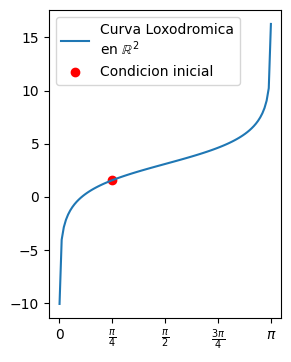

In [8]:
epsilon = 1e-3
thetad = np.linspace(0+epsilon,np.pi - epsilon,100)
phid = np.log(np.tan(thetad/2))*np.tan(beta)-c
phid = np.array(phid, dtype=np.float64)

plt.figure (figsize=(3,4))
plt.plot(thetad,phid, label="Curva Loxodromica\nen $\mathbb{R}^2$")
plt.scatter(theta0,phi0, label="Condicion inicial", color = 'r')
plt.legend()
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],
           [r"$0$",r"$\frac{\pi}{4}$",r"$\frac{\pi}{2}$",r"$\frac{3\pi}{4}$",r"$\pi$"])
plt.show()

In [9]:
np.cos(phid)
# print(phid)

array([-0.80030597, -0.63327428, -0.95843997, -0.55423687, -0.09251646,
        0.28830316,  0.57126492,  0.76796305,  0.89488258,  0.96718749,
        0.9973949 ,  0.99544453,  0.96911398,  0.92446004,  0.866198  ,
        0.79800483,  0.72275474,  0.64270002,  0.55960946,  0.47487449,
        0.38959067,  0.30462078,  0.22064361,  0.1381922 ,  0.05768366,
       -0.02055723, -0.09627934, -0.16929042, -0.2394452 , -0.30663591,
       -0.37078464, -0.4318372 , -0.48975805, -0.54452634, -0.59613253,
       -0.64457573, -0.6898615 , -0.73200005, -0.77100473, -0.80689086,
       -0.83967469, -0.8693726 , -0.89600042, -0.91957288, -0.94010316,
       -0.95760249, -0.97207989, -0.98354187, -0.99199231, -0.99743223,
       -0.99985977, -0.99927003, -0.99565507, -0.98900393, -0.97930261,
       -0.96653417, -0.9506788 , -0.93171405, -0.90961493, -0.88435427,
       -0.85590303, -0.82423074, -0.78930604, -0.75109737, -0.70957382,
       -0.66470618, -0.6164682 , -0.56483824, -0.5098012 , -0.45

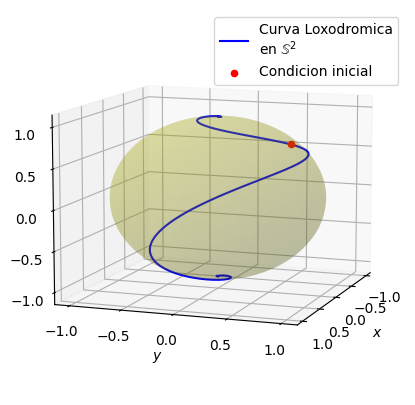

In [10]:
def sphere(r):
    u = np.linspace(0, 2 * np.pi, 200)
    v = np.linspace(0, np.pi, 200)
    d = r*np.outer(np.cos(u), np.sin(v))
    e = r*np.outer(np.sin(u), np.sin(v))
    g = r*np.outer(np.ones(np.size(u)), np.cos(v))
    return d,e,g

x = np.sin(thetad)*np.cos(phid)
y = np.sin(thetad)*np.sin(phid)
z = np.cos(thetad)

x0 = np.sin(theta0)*np.cos(phi0)
y0 = np.sin(theta0)*np.sin(phi0)
z0 = np.cos(theta0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-1,-0.5,0,0.5,1])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
ax.plot_surface(*sphere(1), alpha=0.2, color='y')
ax.plot(x,y,z, label="Curva Loxodromica\nen $\mathbb{S}^2$",color = 'b')
ax.scatter(x0,y0,z0, label="Condicion inicial", color = 'r')
ax.legend()
ax.view_init(10, 20)

In [11]:
def loxodromic_curve(theta0, phi0, beta, elev, azim):
    epsilon = 1e-3
    thetad = np.linspace(0+epsilon,np.pi - epsilon,100)
    c = np.log(np.tan(theta0/2))*np.tan(beta)-phi0
    phid = np.log(np.tan(thetad/2))*np.tan(beta)-c
    phid = np.array(phid, dtype=np.float64)

    x = np.sin(thetad)*np.cos(phid)
    y = np.sin(thetad)*np.sin(phid)
    z = np.cos(thetad)

    x0 = np.sin(theta0)*np.cos(phi0)
    y0 = np.sin(theta0)*np.sin(phi0)
    z0 = np.cos(theta0)
    fig = plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(thetad,phid, label="Curva Loxodromica\nen $\mathbb{R}^2$")
    plt.scatter(theta0,phi0, label="Condicion inicial", color = 'r')
    plt.legend()
    plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],
               [r"$0$",r"$\frac{\pi}{4}$",r"$\frac{\pi}{2}$",r"$\frac{3\pi}{4}$",r"$\pi$"])


    ax = plt.subplot(1,2,2, projection='3d')
    plt.xticks([-1,-0.5,0,0.5,1])
    plt.yticks([-1,-0.5,0,0.5,1])
    ax.set_zticks([-1,-0.5,0,0.5,1])
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_zlabel(r"$z$")
    ax.plot_surface(*sphere(1), alpha=0.2, color='y')
    ax.plot(x,y,z, label="Curva Loxodromica\nen $\mathbb{S}^2$",color = 'b')
    ax.scatter(x0,y0,z0, label="Condicion inicial", color = 'r')
    ax.legend()
    ax.view_init(elev=elev, azim=azim)
    plt.show()



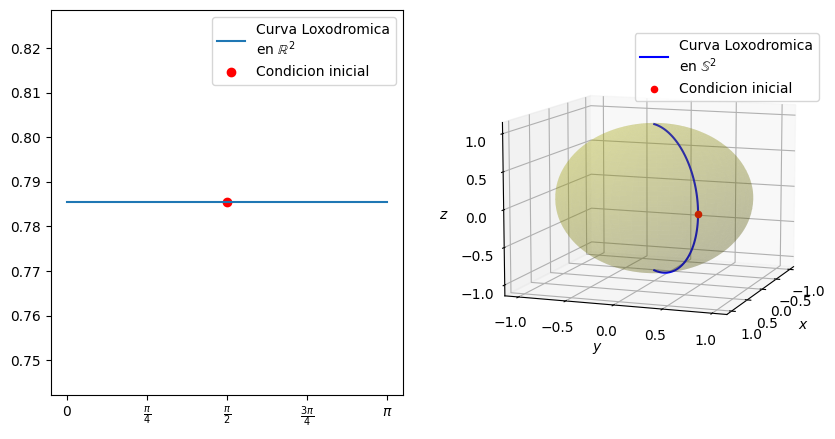

In [12]:
loxodromic_curve(np.pi / 2, np.pi / 4, 0, 10, 20)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=64223e87-f482-4de0-a06c-0f5a66137cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>